In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from TVA1_UU import TVA1_UU as BHDVCS
import plotly.graph_objects as go

In [13]:
dats = pd.read_csv('dvcs_xs_May-2021_342_sets_with_trueCFFs.csv')
n = np.array(dats['#Set'])
ind = np.array(dats['index'])
k = np.array(dats['k'])
qq = np.array(dats['QQ'])
xb = np.array(dats['x_b'])
t = np.array(dats['t'])
phi = np.array(dats['phi_x'])
F = np.array(dats['F'])
errF = np.array(dats['sigmaF'])
varF = np.array(dats['varF']) 
F1 = np.array(dats['F1'])
F2 = np.array(dats['F2'])
const = np.array(dats['dvcs'])
trueReH = np.array(dats['ReH'])
trueReE = np.array(dats['ReE'])
trueReHT = np.array(dats['ReHTilde'])

def getSet(sets, setNum, itemsInSet=45):
    a = setNum*itemsInSet
    b = (setNum+1)*itemsInSet-1
    return sets[a:b]

bhdvcs = BHDVCS()

In [4]:
def cffplot(setNum, itemsInSet = 45):
    cffs = pd.read_csv("Results"+str(setNum)+".csv")
    a = setNum*itemsInSet
    b = (setNum+1)*itemsInSet-1
    ReHfit = np.mean(cffs["ReH"])
    ReEfit = np.mean(cffs["ReE"])
    ReHTfit = np.mean(cffs["ReHtilde"])
    xdat = np.transpose(np.array([phi[a:b], k[a:b], qq[a:b], xb[a:b], t[a:b], F1[a:b], F2[a:b], const[a:b]]))
    plt.plot(phi[a:b], F[a:b], 'ko', label='data')
    plt.plot(phi[a:b], bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit), 'r-', label='fit')
    rmse = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit)),2)))
    print(rmse)
    plt.title("set "+str(setNum+1))
    #plt.savefig('Histogram_'+str(setNum)+'.png', dpi=300)
    plt.show()

In [29]:
def cffplot(setNum, itemsInSet = 45):
    epoch=100
    filename = "100epoch/Results"+str(setNum)+ "_" + str(epoch) + ".csv"
    if epoch == 1000:
        filename = "Results"+str() + ".csv"
    cffs = pd.read_csv(filename)
    a = setNum*itemsInSet
    b = (setNum+1)*itemsInSet-1
    ReHfit = np.mean(cffs["ReH"])
    ReEfit = np.mean(cffs["ReE"])
    ReHTfit = np.mean(cffs["ReHtilde"])
    xdat = np.transpose(np.array([phi[a:b], k[a:b], qq[a:b], xb[a:b], t[a:b], F1[a:b], F2[a:b], const[a:b]]))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=phi[a:b], y=F[a:b], mode='markers'))
    fig.add_trace(go.Scatter(x=phi[a:b], y=bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit), mode='lines', name='Fit'))
    rmse = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit)),2)))
    print("Fit RMSE "+str(setNum+1)+" : "+str(rmse))
    #print(str(round(ReHfit,5)) + str(round(ReEfit,5)) + str(round(ReHTfit,5)))
    fig.add_trace(go.Scatter(x=phi[a:b], y=bhdvcs.TotalUUXS(xdat,trueReH[a:b],trueReE[a:b],trueReHT[a:b]), mode='lines', name='True'))
    rmset = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,trueReH[a:b],trueReE[a:b],trueReHT[a:b])),2)))
    print("True RMSE "+str(setNum+1)+": "+str(rmset))
    print(np.array([[round(ReHfit,5),round(ReEfit,5),round(ReHTfit,5)],[round(trueReH[a],5),round(trueReE[a],5),round(trueReHT[a],5)]]))
    #print(str(round(trueReH[a],5)) + str(round(trueReE[a],5)) + str(round(trueReHT[a],5)))
    #fig.add_annotation(text="RMSE: "+str(rmse),showarrow=False)
    fig.update_layout(template="plotly_dark",title_text="Set "+str(setNum+1),showlegend=False,width=800,height=800)
    #plt.savefig('Histogram_'+str(setNum)+'.png', dpi=300)
    fig.show()

str RMSE 10 : 0.018070722757026654
True RMSE 10: 0.009585913388358637
[[ 1.4     51.      -5.     ]
 [ 1.30131 -2.20789  4.35799]]


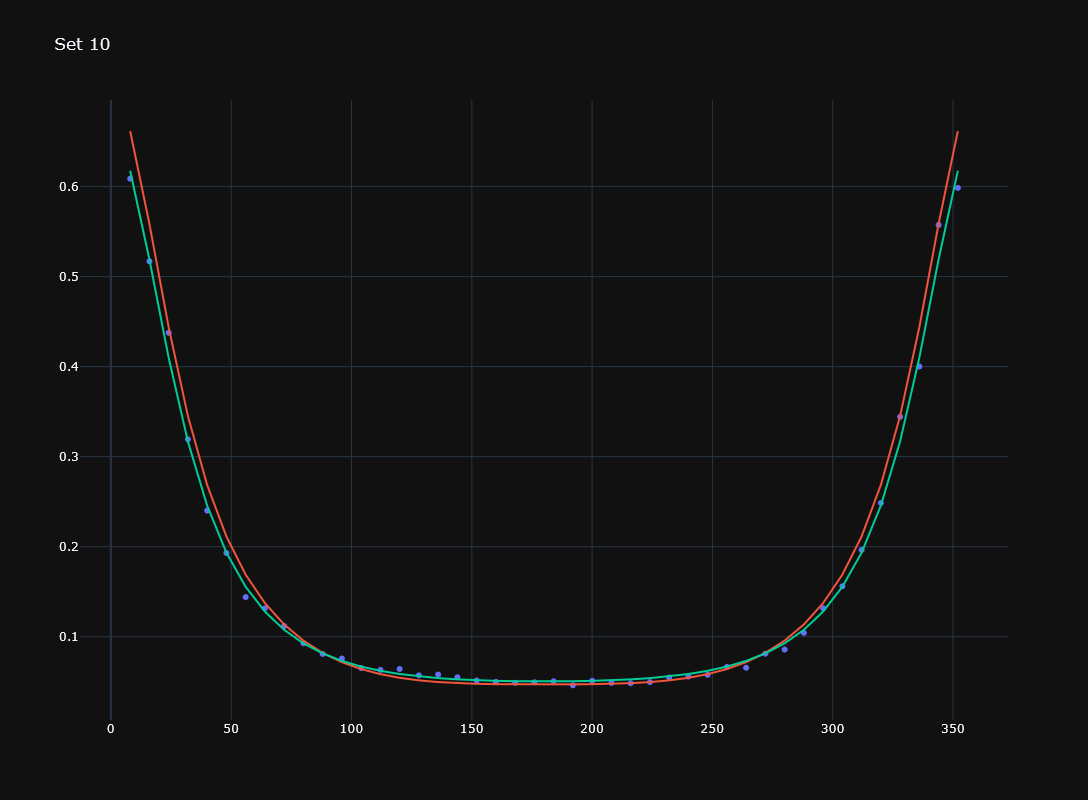

In [61]:
def stuff(setNum, reh, ree, reht, itemsInSet = 45):
    epoch=100
    filename = "100epoch/Results"+str(setNum)+ "_" + str(epoch) + ".csv"
    if epoch == 1000:
        filename = "Results"+str() + ".csv"
    cffs = pd.read_csv(filename)
    a = setNum*itemsInSet
    b = (setNum+1)*itemsInSet-1
    xdat = np.transpose(np.array([phi[a:b], k[a:b], qq[a:b], xb[a:b], t[a:b], F1[a:b], F2[a:b], const[a:b]]))
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=phi[a:b], y=F[a:b], mode='markers'))
    fig.add_trace(go.Scatter(x=phi[a:b], y=bhdvcs.TotalUUXS(xdat,reh,ree,reht), mode='lines', name='Fit'))
    rmse = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,reh,ree,reht)),2)))
    print("str RMSE "+str(setNum+1)+" : "+str(rmse))
    #print(str(round(ReHfit,5)) + str(round(ReEfit,5)) + str(round(ReHTfit,5)))
    fig.add_trace(go.Scatter(x=phi[a:b], y=bhdvcs.TotalUUXS(xdat,trueReH[a:b],trueReE[a:b],trueReHT[a:b]), mode='lines', name='True'))
    rmset = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,trueReH[a:b],trueReE[a:b],trueReHT[a:b])),2)))
    print("True RMSE "+str(setNum+1)+": "+str(rmset))
    print(np.array([[round(reh,5),round(ree,5),round(reht,5)],[round(trueReH[a],5),round(trueReE[a],5),round(trueReHT[a],5)]]))
    #print(str(round(trueReH[a],5)) + str(round(trueReE[a],5)) + str(round(trueReHT[a],5)))
    #fig.add_annotation(text="RMSE: "+str(rmse),showarrow=False)
    fig.update_layout(template="plotly_dark",title_text="Set "+str(setNum+1),showlegend=False,width=800,height=800)
    #plt.savefig('Histogram_'+str(setNum)+'.png', dpi=300)
    fig.show()
stuff(9,1.4,51,-5)
#0.017534701701144594

Fit RMSE 10 : 0.00959098507546247
True RMSE 10: 0.009585913388358637
[[-0.50615 50.28605 -4.51133]
 [ 1.30131 -2.20789  4.35799]]


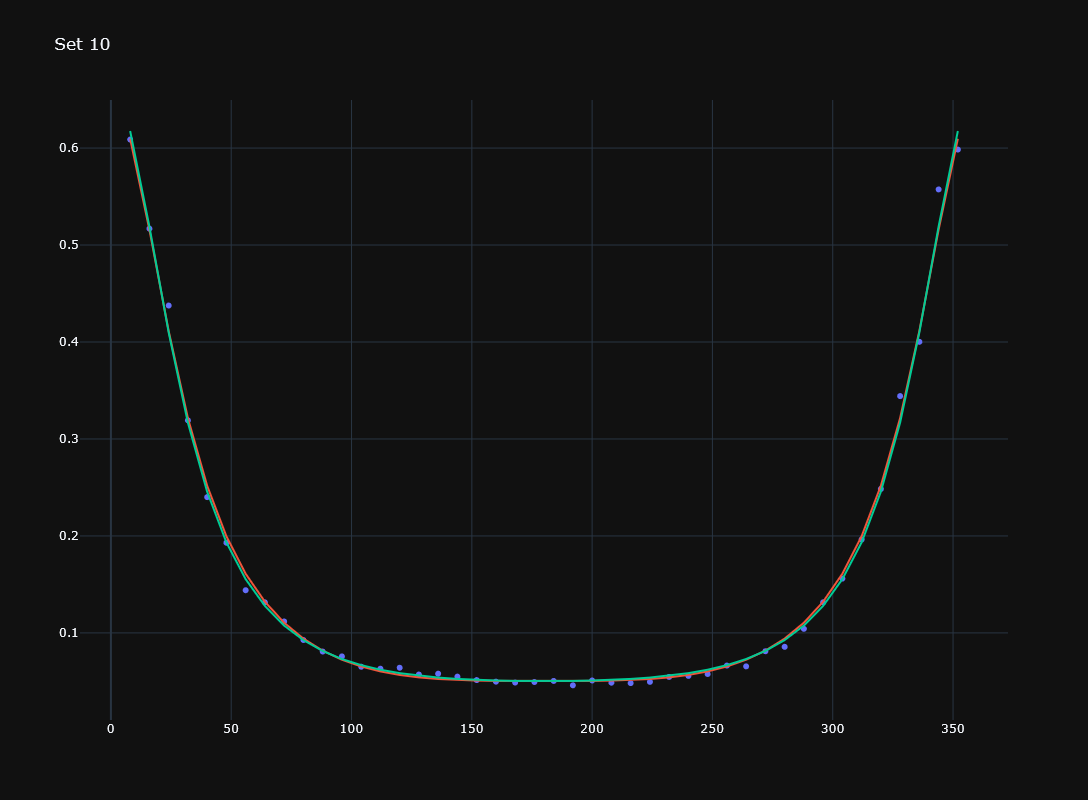

In [30]:
cffplot(9)

In [74]:
def meanrmse(setNum, itemsInSet = 45):
    tot = 0
    for x in range(0, setNum):
        cffs = pd.read_csv("Results"+str(x)+".csv")
        a = x*itemsInSet
        b = (x+1)*itemsInSet-1
        ReHfit = np.mean(cffs["ReH"])
        ReEfit = np.mean(cffs["ReE"])
        ReHTfit = np.mean(cffs["ReHtilde"])
        xdat = np.transpose(np.array([phi[a:b], k[a:b], qq[a:b], xb[a:b], t[a:b], F1[a:b], F2[a:b], const[a:b]]))
        rmse = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit)),2)))
        tot = tot + rmse
        #print(rmse)
    #print(tot)
    print(tot/setNum)

meanrmse(10)

0.014184401294108561


In [5]:
def cffdistplot(setNum):
    data = pd.DataFrame(columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe'])
    for x in range(0,setNum):
        cffs = pd.read_csv("Results"+str(x)+".csv")
        ReHfit = np.mean(cffs["ReH"])
        ReEfit = np.mean(cffs["ReE"])
        ReHTfit = np.mean(cffs["ReHtilde"])
        size = cffs["ReH"].size
        size = 1
        ReHe = np.std(cffs["ReH"])/math.sqrt(size)
        ReEe = np.std(cffs["ReE"])/math.sqrt(size)
        ReHTe = np.std(cffs["ReHtilde"])/math.sqrt(size)
        cff = pd.DataFrame([[x+1, ReHfit, ReHe, ReEfit, ReEe, ReHTfit, ReHTe]],columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe'])
        data=data.append(cff)
    rehfig = go.Figure()
    rehfig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReH"]), error_y=dict(type='data', array=np.array(data["ReHe"]), visible=True),mode='markers'))
    rehfig.update_layout(template="plotly_dark",title_text="ReH",showlegend=False)
    rehfig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    rehfig.show()
    reefig = go.Figure()
    reefig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReE"]), error_y=dict(type='data', array=np.array(data["ReEe"]), visible=True),mode='markers'))
    reefig.update_layout(template="plotly_dark",title_text="ReE",showlegend=False)
    reefig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    reefig.show()
    rehtfig = go.Figure()
    rehtfig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReHT"]), error_y=dict(type='data', array=np.array(data["ReHTe"]), visible=True),mode='markers'))
    rehtfig.update_layout(template="plotly_dark",title_text="ReHT",showlegend=False)
    rehtfig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    rehtfig.show()
    print(data)

In [ ]:
for x in range(0,10):
    try:
        cffplot(x)
    except: 
        print("")

In [26]:
def cffdistplot100(sets , epochslist = [100], itemsInSet = 45):
    rehtfig = go.Figure()
    reefig = go.Figure()
    rehfig = go.Figure()
    
    
    for epoch in epochslist:
        data = pd.DataFrame(columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe'])
        for x in sets:
            a = x*itemsInSet
            b = (x+1)*x-1
            
            filename = "100epoch/Results"+str(x)+ "_" + str(epoch) + ".csv"
            if epoch == 1000:
                filename = "Results"+str(x) + ".csv"
            cffs = pd.read_csv(filename)
            
            ReHfit = np.mean(cffs["ReH"])
            ReEfit = np.mean(cffs["ReE"])
            ReHTfit = np.mean(cffs["ReHtilde"])
            size = cffs["ReH"].size
            size = 1
            ReHe = np.std(cffs["ReH"])/math.sqrt(size)
            ReEe = np.std(cffs["ReE"])/math.sqrt(size)
            ReHTe = np.std(cffs["ReHtilde"])/math.sqrt(size)
            cff = pd.DataFrame([[x+1, ReHfit, ReHe, ReEfit, ReEe, ReHTfit, ReHTe, trueReH[a], trueReE[a], trueReHT[a]]],columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe', 'trueReH', 'trueReE', 'trueReHT'])
            data=data.append(cff)
        rehfig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReH"]), error_y=dict(type='data', array=np.array(data["ReHe"]), visible=True),mode='markers', name=str(epoch)))
        rehfig.add_trace(go.Scatter(x=np.array(data["set"]), y = np.array(data["trueReH"]), mode='markers', name="True"))
        reefig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReE"]), error_y=dict(type='data', array=np.array(data["ReEe"]), visible=True),mode='markers', name=str(epoch)))    
        reefig.add_trace(go.Scatter(x=np.array(data["set"]), y = np.array(data["trueReE"]), mode='markers', name="True"))
        rehtfig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReHT"]), error_y=dict(type='data', array=np.array(data["ReHTe"]), visible=True),mode='markers', name=str(epoch)))
        rehtfig.add_trace(go.Scatter(x=np.array(data["set"]), y = np.array(data["trueReHT"]), mode='markers', name="True"))
        #print(data)
    rehfig.update_layout(template="plotly_dark",title_text="ReH",showlegend=False)
    rehfig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    rehfig.show()
    reefig.update_layout(template="plotly_dark",title_text="ReE",showlegend=False)
    reefig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    reefig.show()
    rehtfig.update_layout(template="plotly_dark",title_text="ReHT",showlegend=False)
    rehtfig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    rehtfig.show()

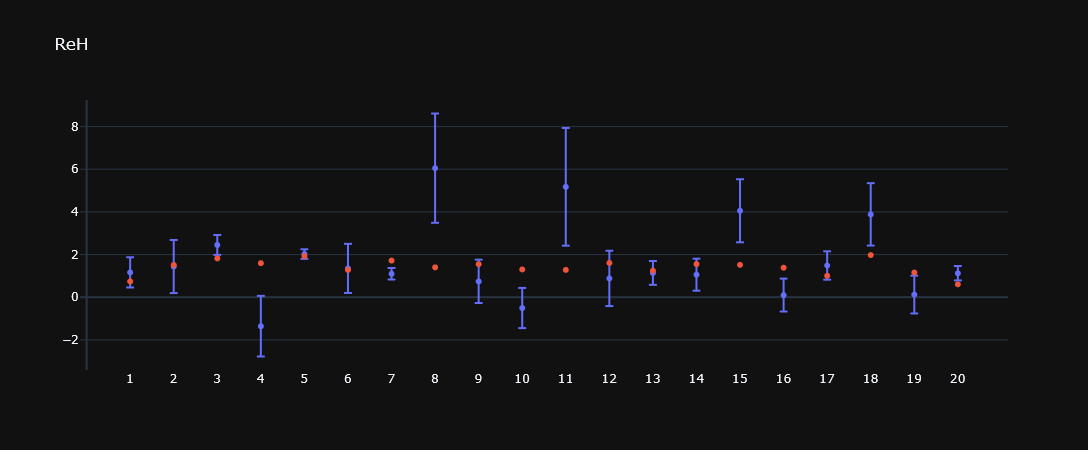

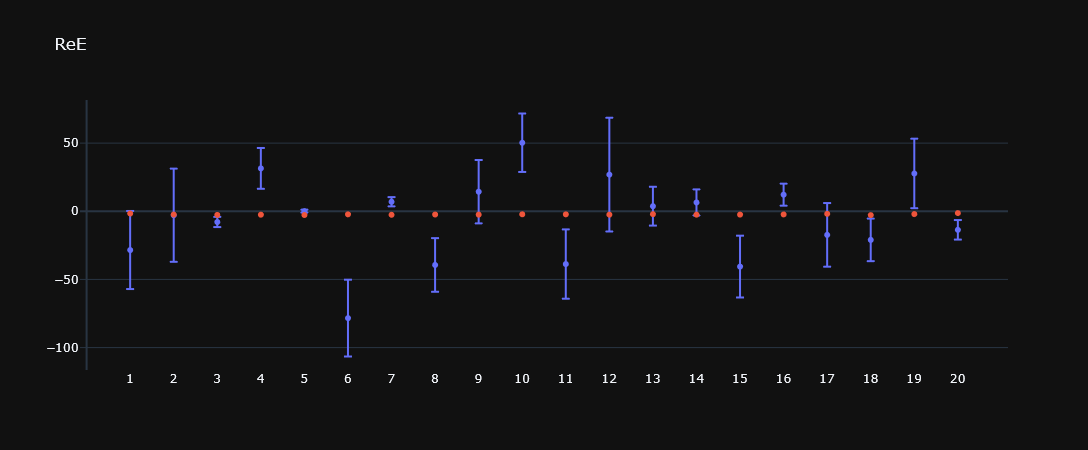

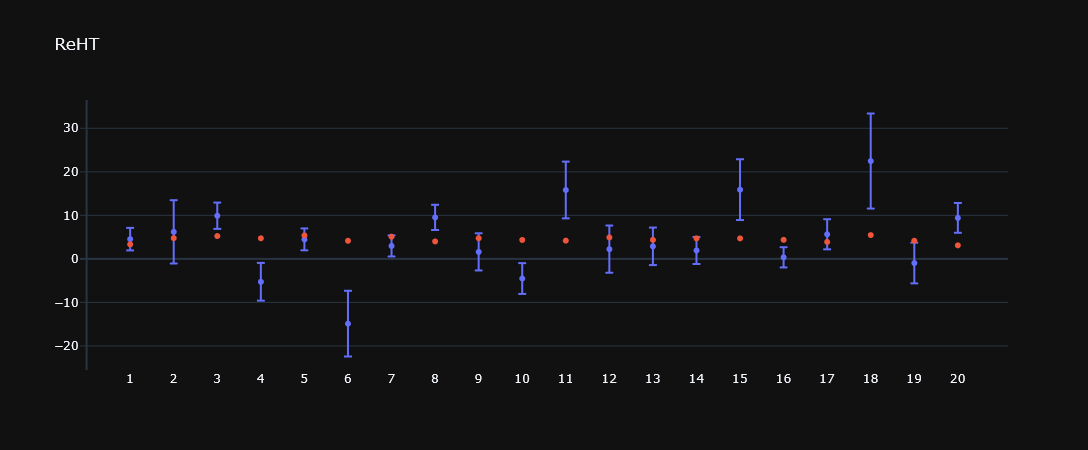

In [28]:
cffdistplot100(range(0,20))

# Epochs

In [5]:
print(range(1:4))

SyntaxError: invalid syntax (<ipython-input-5-5c0fcfed2d9b>, line 1)

In [5]:
def cffplotepochs(setNum, epochslist, itemsInSet = 45):
    
    a = setNum*itemsInSet
    b = (setNum+1)*itemsInSet-1
    xdat = np.transpose(np.array([phi[a:b], k[a:b], qq[a:b], xb[a:b], t[a:b], F1[a:b], F2[a:b], const[a:b]]))
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=phi[a:b], y=F[a:b], mode='markers', name = 'F'))
    for epoch in epochslist:
        filename = "Results"+str(setNum)+ "_" + str(epoch) + ".csv"
        if epoch == 1000:
            filename = "Results"+str(setNum) + ".csv"
        cffs = pd.read_csv(filename)
        ReHfit = np.mean(cffs["ReH"])
        ReEfit = np.mean(cffs["ReE"])
        ReHTfit = np.mean(cffs["ReHtilde"])
        rmse = math.sqrt(np.mean(np.power(np.subtract(F[a:b],bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit)),2)))
        fig.add_trace(go.Scatter(x=phi[a:b], y=bhdvcs.TotalUUXS(xdat,ReHfit,ReEfit,ReHTfit), mode='lines', name=str(epoch)+" RMSE: "+str(rmse)))
        #fig.add_annotation(text="RMSE: "+str(rmse),showarrow=False)
    fig.update_layout(template="plotly_dark",title_text="Set "+str(setNum+1),showlegend=True)#,width=800,height=800)
    #plt.savefig('Histogram_'+str(setNum)+'.png', dpi=300)
    fig.show()

In [4]:
def cffdistplotepochs(setNum, epochslist):
    rehtfig = go.Figure()
    reefig = go.Figure()
    rehfig = go.Figure()
    
    
    for epoch in epochslist:
        data = pd.DataFrame(columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe'])
        for x in range(1,setNum):
            filename = "Results"+str(x)+ "_" + str(epoch) + ".csv"
            if epoch == 1000:
                filename = "Results"+str(x) + ".csv"
            cffs = pd.read_csv(filename)
            #print(filename)
            ReHfit = np.mean(cffs["ReH"])
            ReEfit = np.mean(cffs["ReE"])
            ReHTfit = np.mean(cffs["ReHtilde"])
            size = cffs["ReH"].size
            size = 1
            ReHe = np.std(cffs["ReH"])/math.sqrt(size)
            ReEe = np.std(cffs["ReE"])/math.sqrt(size)
            ReHTe = np.std(cffs["ReHtilde"])/math.sqrt(size)
            cff = pd.DataFrame([[x+1, ReHfit, ReHe, ReEfit, ReEe, ReHTfit, ReHTe]],columns=['set','ReH','ReHe','ReE','ReEe','ReHT','ReHTe'])
            data=data.append(cff)
        rehfig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReH"]), error_y=dict(type='data', array=np.array(data["ReHe"]), visible=True),mode='markers', name=str(epoch)))
        reefig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReE"]), error_y=dict(type='data', array=np.array(data["ReEe"]), visible=True),mode='markers', name=str(epoch)))    
        rehtfig.add_trace(go.Scatter(x=np.array(data["set"]), y=np.array(data["ReHT"]), error_y=dict(type='data', array=np.array(data["ReHTe"]), visible=True),mode='markers', name=str(epoch)))
        #print(data)
    rehfig.update_layout(template="plotly_dark",title_text="ReH",showlegend=False)
    rehfig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    rehfig.show()
    reefig.update_layout(template="plotly_dark",title_text="ReE",showlegend=False)
    reefig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    reefig.show()
    rehtfig.update_layout(template="plotly_dark",title_text="ReHT",showlegend=False)
    rehtfig.update_xaxes(tickvals=np.array(data["set"]),showgrid=False)
    rehtfig.show()

In [ ]:
cffdistplotepochs(6, [100,200,300,500,1000])

In [ ]:
for x in range(1,6):
    cffplotepochs(x, [100,200,300,500,1000])

1
2
3
4
